# Visualizing Netflix Data in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(7787, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Calculating the missing data 

for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


In [9]:
# Dealing with the missing data 
# Here we will be replacing the missing country with the most country (mode), cast, and director with no data.

df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan,'No data',inplace=True)
df['director'].replace(np.nan,'No data',inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# Now we are done with missing values, but the dates are still not quite right

df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020


In [12]:
# Calculating the missing data 

df.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
dtype: int64

# EXAMPLE 1

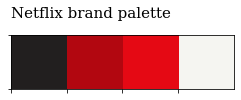

In [13]:
# Always use a color palette, it is a great way in achieving good integrity and helps us to give a professional look keeping all the readers engaged.

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [14]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T

In [15]:
x

type
Movie      5372
TV Show    2398
Name: type, dtype: int64

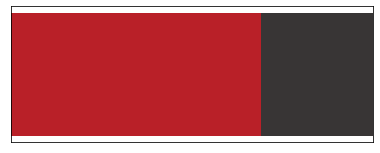

In [16]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'],
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [17]:
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

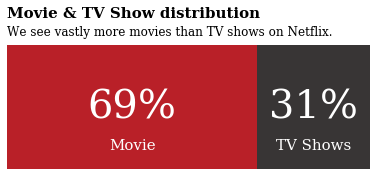

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()


# EXAMPLE 2

In [19]:
df['country']


0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7770, dtype: object

In [20]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: first_country, Length: 7770, dtype: object

In [21]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [22]:
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

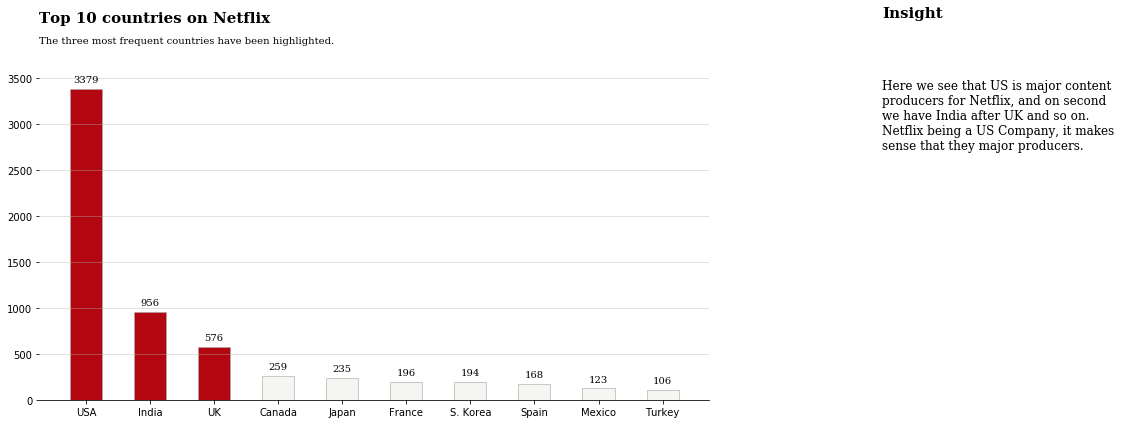

In [23]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))

#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
    #Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Here we see that US is major content 
producers for Netflix, and on second
we have India after UK and so on.
Netflix being a US Company, it makes 
sense that they major producers.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)